# Construire un moteur de recommandation de films

5 ÉTAPES :
- Se procurer la base de données
- Nettoyer la base de données
- Effectuer une analyse exploratoire / Visualiser nos données
- Feature engineering
- Choix du modèle final

## 1. Se procurer la base de données

Nous allons utiliser ici la base de données publique The Movie Databse (TMDb) qui est une base de données collaborative entièrement complété par sa communauté. 
Lien de la base de données : https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Moteur+de+recommandation+de+films/imdb-5000-movie-dataset.zip 
Nous allons maintenant l'inspecter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings 



In [2]:
df = pd.read_csv("movie_metadata.csv", sep=',')

In [3]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.tail(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
df.shape

(5043, 28)

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## 2. Nettoyer la base de données

### a. Valeurs dupliquées

In [8]:
# Suppression des lignes avec des duplicates values 

df.drop_duplicates(inplace=True)

In [9]:
# Dupplicates sur la colonnes movie_title ?

duplicates = df[df.movie_title.map(df.movie_title.value_counts() > 1)]
duplicates.sort_values('movie_title')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
1113,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
4128,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334185206.0,Adventure|Family|Fantasy,...,736.0,English,USA,PG,200000000.0,2010.0,25000.0,6.5,1.85,24000
33,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334185206.0,Adventure|Family|Fantasy,...,736.0,English,USA,PG,200000000.0,2010.0,25000.0,6.5,1.85,24000
2639,Color,Cameron Crowe,138.0,105.0,488.0,13000.0,Bradley Cooper,15000.0,20991497.0,Comedy|Drama|Romance,...,172.0,English,USA,PG-13,37000000.0,2015.0,14000.0,5.4,1.85,11000
1389,Color,Cameron Crowe,138.0,105.0,488.0,13000.0,Bradley Cooper,15000.0,20991497.0,Comedy|Drama|Romance,...,172.0,English,USA,PG-13,37000000.0,2015.0,14000.0,5.4,1.85,11000


In [10]:
# Supression des film du même nom et de la même année

df.drop_duplicates(subset=['movie_title', 'title_year'], inplace=True)

### b. Valeurs manquantes

Text(0.5,1,'Proportion de valeurs manquantes par colonnes ')

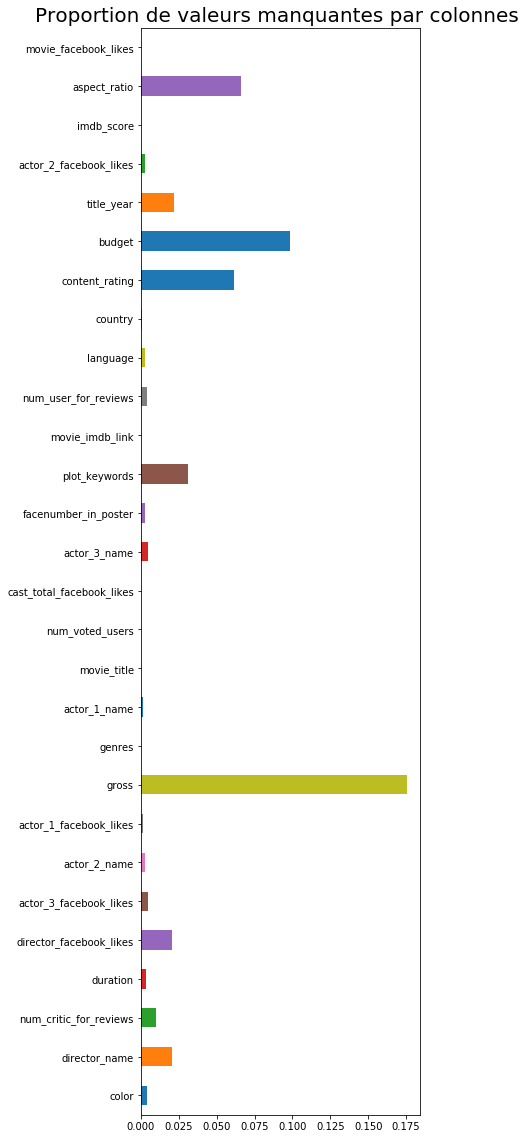

In [11]:
# Proportion de valeurs manquantes par colonnes 

plt.figure(figsize=(5, 20))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion de valeurs manquantes par colonnes ", fontsize=20)

In [12]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [13]:
# Suppression des lignes contenant des valeurs manquantes sur toutes les colonnes (s'il y en a)

df.dropna(axis=0, how="all")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


Il n'y a ici pas de lignes avec des valeurs maquantes sur toutes les colonnes. 

### c. Valeurs aberrantes

In [14]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4870.000000,4904.000000,4817.000000,4896.000000,4912.000000,4.056000e+03,4.919000e+03,4919.000000,4906.000000,4898.000000,4.434000e+03,4813.000000,4906.000000,4919.000000,4593.000000,4919.000000
mean,138.010267,107.089111,690.705418,630.961397,6490.875814,4.762156e+07,8.261820e+04,9574.645863,1.376478,267.603512,3.928822e+07,2002.445045,1621.071545,6.437874,2.222105,7345.293556
std,120.253857,25.278583,2832.107042,1625.428769,15103.081835,6.736387e+07,1.382858e+05,18159.992290,2.023493,372.839155,2.085579e+08,12.453460,4010.222585,1.127606,1.402514,19200.708189
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.008728e+06,8.356500e+03,1394.000000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,365.500000,982.000000,2.503566e+07,3.315800e+04,3044.000000,1.000000,153.500000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,160.000000
75%,191.000000,118.000000,190.000000,633.000000,11000.000000,6.109941e+07,9.375750e+04,13611.500000,2.000000,320.000000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Il ne semble pas y avoir de valeurs aberrantes.

### d. Mise en forme des variables

In [15]:
# Mise en forme de la colonne color 

df.color = df.color.map({'Color': 1, ' Black and White':0})

In [16]:
df.content_rating.value_counts()

R            2069
PG-13        1411
PG            686
Not Rated     115
G             112
Unrated        59
Approved       54
TV-14          30
TV-MA          18
TV-PG          13
X              12
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [17]:
# Mise en forme de la colonne content_rating

df.content_rating = df.content_rating.map({'R': 17, 'PG-13': 13, 'PG': 0, 'Not Rated': 'NaN',
                                                  'G': 0, 'Unrated': 'NaN', 'Approved': 0, 'TV-14': 14,
                                                  'TV-MA': 17, 'TV-PG': 0, 'X': 17, 'TV-G': 0, 'Passed': 0,
                                                  'NC-17':17, 'GP':0, 'M': 17, 'TV-Y': 17, 'TV-Y7':17})

In [18]:
df.content_rating.value_counts()

17     2113
13     1411
0       890
NaN     174
14       30
Name: content_rating, dtype: int64

In [19]:
# Mise en forme de la colonne movie_title

for index,movie in df.iterrows():
    df['movie_title'][index] = df['movie_title'][index].replace(u"\xa0", u"")

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
df['movie_title'][4]

'Star Wars: Episode VII - The Force Awakens            '

## 3. Analyse exploratoire 

Dans cette partie, nous allons nous limiter à une analyse de la répartition des différentes variables numériques. 

moy:
 9574.64586298028
med:
 3044.0


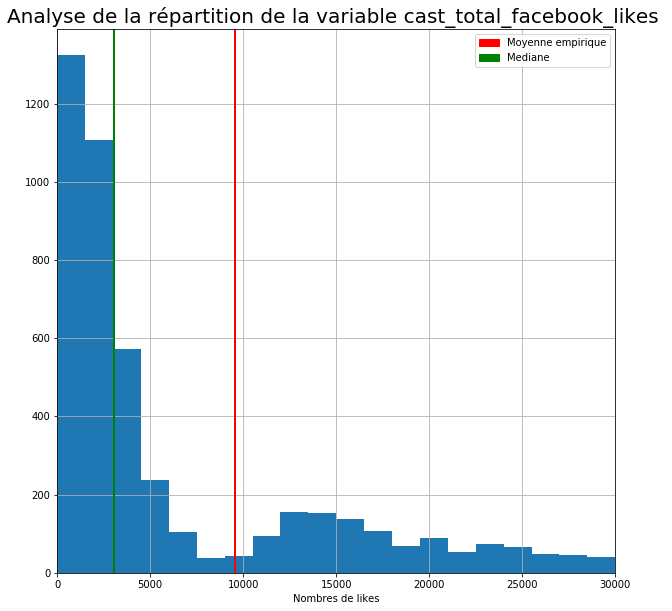

In [21]:
# cast_total_facebook_likes

print("moy:\n",df['cast_total_facebook_likes'].mean())
print("med:\n",df['cast_total_facebook_likes'].median())
plt.figure(figsize=(10,10))
df['cast_total_facebook_likes'].hist(bins=20, range=(0,30000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 30000)
plt.title("Analyse de la répartition de la variable cast_total_facebook_likes ", fontsize=20)
plt.xlabel('Nombres de likes')
xbar = df['cast_total_facebook_likes'].mean()
xmed = df['cast_total_facebook_likes'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 690.7054183101516
med:
 48.0


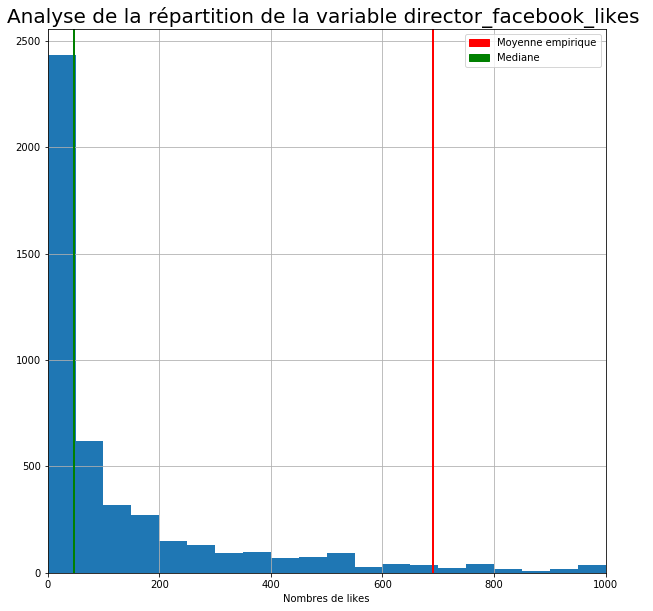

In [22]:
#director_facebook_likes

print("moy:\n",df['director_facebook_likes'].mean())
print("med:\n",df['director_facebook_likes'].median())
plt.figure(figsize=(10,10))
df['director_facebook_likes'].hist(bins=20, range=(0,1000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 1000)
plt.title("Analyse de la répartition de la variable director_facebook_likes ", fontsize=20)
plt.xlabel('Nombres de likes')
xbar = df['director_facebook_likes'].mean()
xmed = df['director_facebook_likes'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 7345.293555600731
med:
 160.0


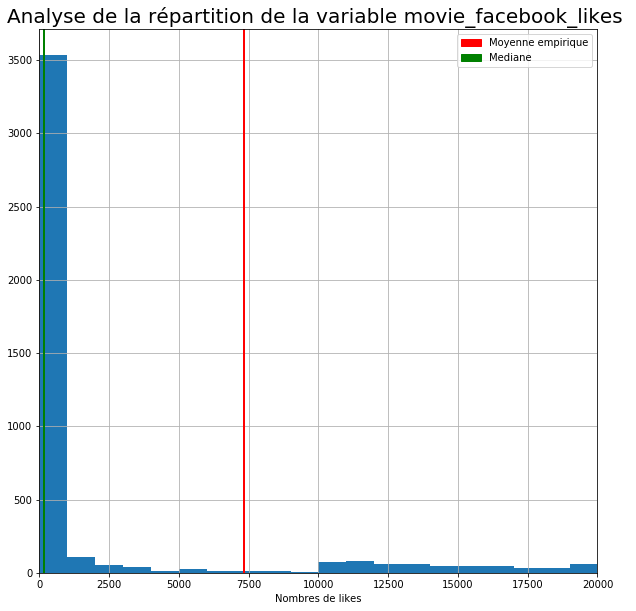

In [23]:
#movie_facebook_likes

print("moy:\n",df['movie_facebook_likes'].mean())
print("med:\n",df['movie_facebook_likes'].median())
plt.figure(figsize=(10,10))
df['movie_facebook_likes'].hist(bins=20, range=(0,20000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 20000)
plt.title("Analyse de la répartition de la variable movie_facebook_likes ", fontsize=20)
plt.xlabel('Nombres de likes')
xbar = df['movie_facebook_likes'].mean()
xmed = df['movie_facebook_likes'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 138.01026694045174
med:
 108.0


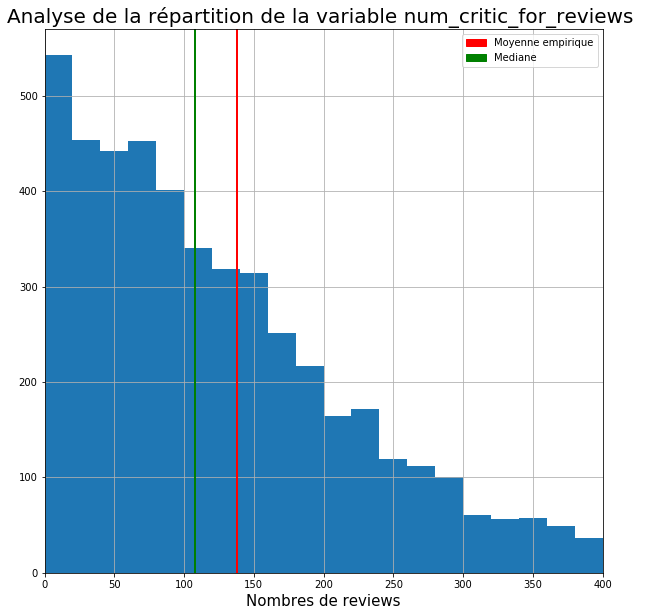

In [24]:
#num_critic_for_reviews

print("moy:\n",df['num_critic_for_reviews'].mean())
print("med:\n",df['num_critic_for_reviews'].median())
plt.figure(figsize=(10,10))
df['num_critic_for_reviews'].hist(bins=20, range=(0,400)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 400)
plt.title("Analyse de la répartition de la variable num_critic_for_reviews ", fontsize=20)
plt.xlabel('Nombres de reviews', fontsize=15)
xbar = df['num_critic_for_reviews'].mean()
xmed = df['num_critic_for_reviews'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 82618.19760113844
med:
 33158.0


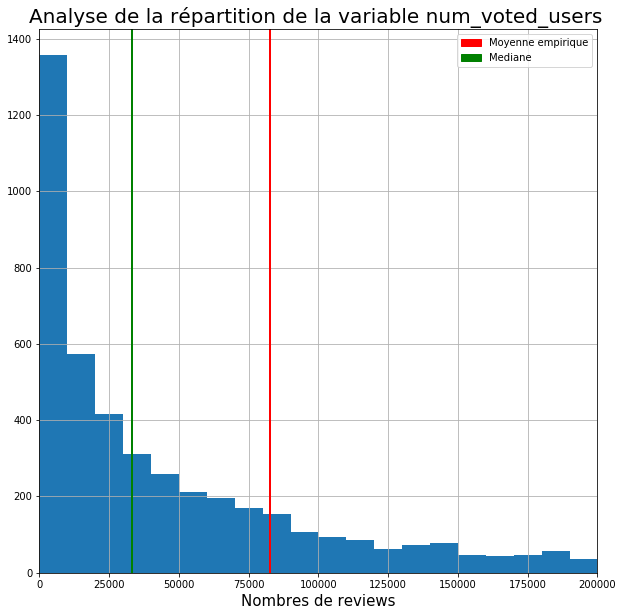

In [25]:
#num_voted_users

print("moy:\n",df['num_voted_users'].mean())
print("med:\n",df['num_voted_users'].median())
plt.figure(figsize=(10,10))
df['num_voted_users'].hist(bins=20, range=(0,200000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 200000)
plt.title("Analyse de la répartition de la variable num_voted_users ", fontsize=20)
plt.xlabel('Nombres de reviews', fontsize=15)
xbar = df['num_voted_users'].mean()
xmed = df['num_voted_users'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 267.603511637403
med:
 153.5


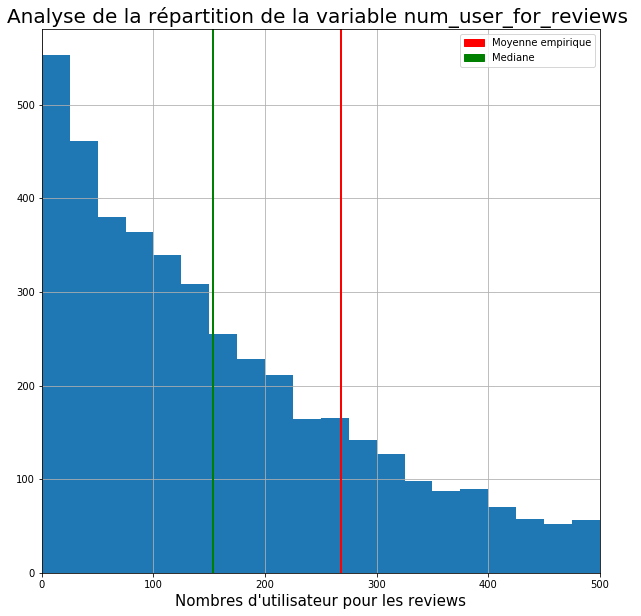

In [26]:
#num_user_for_reviews

print("moy:\n",df['num_user_for_reviews'].mean())
print("med:\n",df['num_user_for_reviews'].median())
plt.figure(figsize=(10,10))
df['num_user_for_reviews'].hist(bins=20, range=(0,500)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 500)
plt.title("Analyse de la répartition de la variable num_user_for_reviews ", fontsize=20)
plt.xlabel("Nombres d'utilisateur pour les reviews", fontsize=15)
xbar = df['num_user_for_reviews'].mean()
xmed = df['num_user_for_reviews'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 6.437873551534859
med:
 6.6


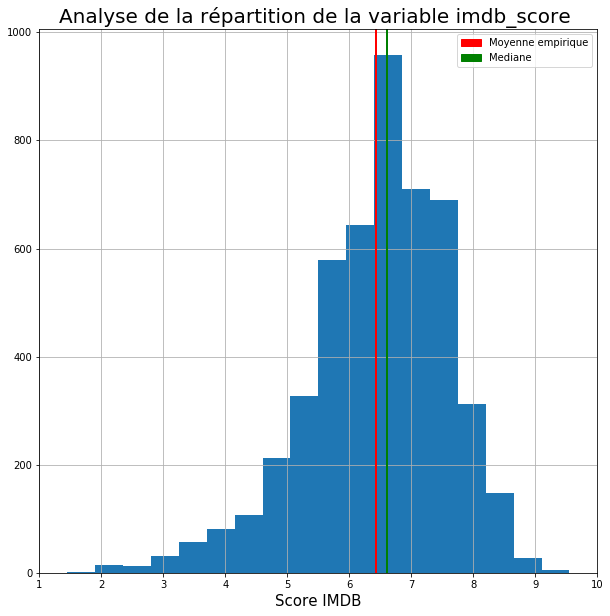

In [27]:
#num_user_for_reviews

print("moy:\n",df['imdb_score'].mean())
print("med:\n",df['imdb_score'].median())
plt.figure(figsize=(10,10))
df['imdb_score'].hist(bins=20, range=(1,10)) # Crée l'histogramme
plt.xlim(xmin=1, xmax = 10)
plt.title("Analyse de la répartition de la variable imdb_score ", fontsize=20)
plt.xlabel('Score IMDB', fontsize=15)
xbar = df['imdb_score'].mean()
xmed = df['imdb_score'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 107.08911092985318
med:
 103.0


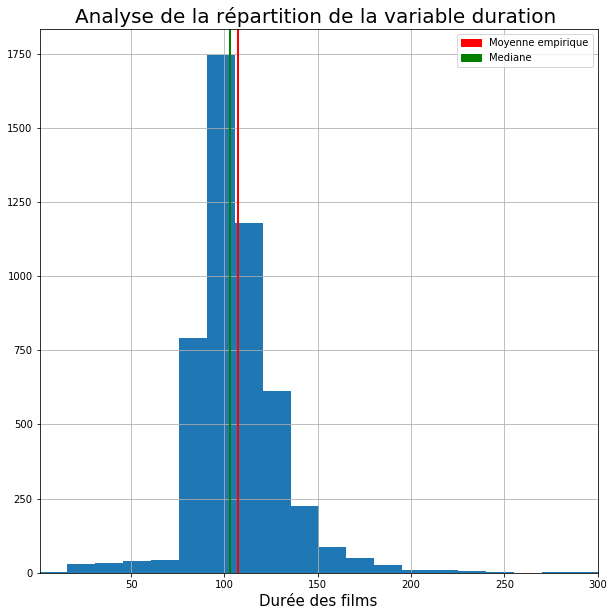

In [28]:
#duration

print("moy:\n",df['duration'].mean())
print("med:\n",df['duration'].median())
plt.figure(figsize=(10,10))
df['duration'].hist(bins=20, range=(1,300)) # Crée l'histogramme
plt.xlim(xmin=1, xmax = 300)
plt.title("Analyse de la répartition de la variable duration ", fontsize=20)
plt.xlabel('Durée des films', fontsize=15)
xbar = df['duration'].mean()
xmed = df['duration'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 39288217.878664866
med:
 19850000.0


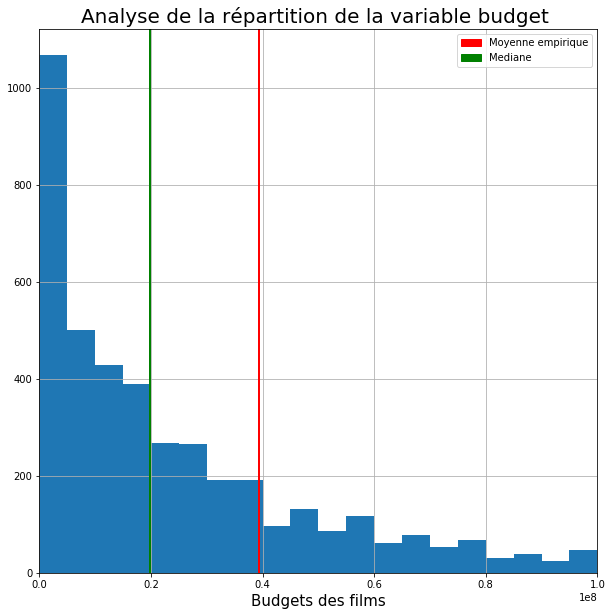

In [29]:
#budget

print("moy:\n",df['budget'].mean())
print("med:\n",df['budget'].median())
plt.figure(figsize=(10,10))
df['budget'].hist(bins=20, range=(1,100000000)) # Crée l'histogramme
plt.xlim(xmin=1, xmax = 100000000)
plt.title("Analyse de la répartition de la variable budget ", fontsize=20)
plt.xlabel('Budgets des films', fontsize=15)
xbar = df['budget'].mean()
xmed = df['budget'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

moy:
 2002.4450446706835
med:
 2005.0


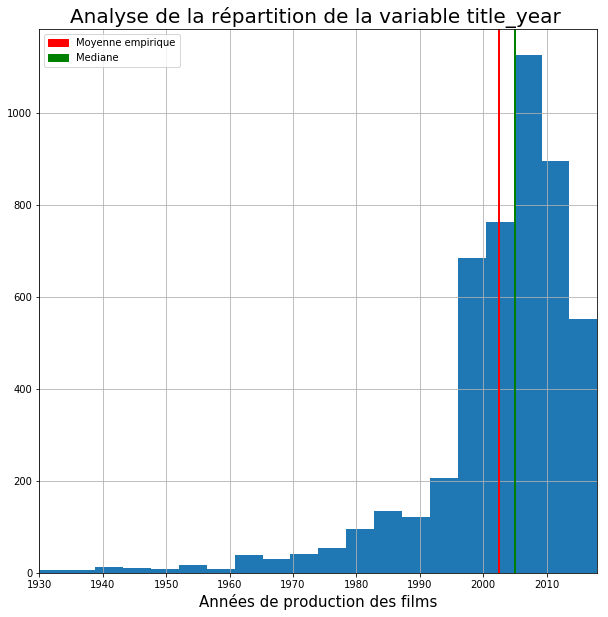

In [30]:
#budget

print("moy:\n",df['title_year'].mean())
print("med:\n",df['title_year'].median())
plt.figure(figsize=(10,10))
df['title_year'].hist(bins=20, range=(1930,2018)) # Crée l'histogramme
plt.xlim(xmin=1930, xmax = 2018)
plt.title("Analyse de la répartition de la variable title_year ", fontsize=20)
plt.xlabel('Années de production des films', fontsize=15)
xbar = df['title_year'].mean()
xmed = df['title_year'].median()
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(xmed, color='g', linewidth=2)

import matplotlib.patches as mpatches


red_patch = mpatches.Patch(color='red', label='Moyenne empirique')
green_patch = mpatches.Patch(color='green', label='Mediane')
plt.legend(handles=[red_patch, green_patch])

Les principales conclusions que nous pouvons tirer ici sont les suivantes :
- Les variables de types "likes" ne sont pas très pertinentes car il y a trop trop de concentration dans les données, ce qui ne nous permet pas de bien distinguer un film d'un autre. 
- Les variables IMDB et duration ont une répartition proche de la loi normale

Cette première analyse sommaire va nous permettre d'éliminer certaines variables. 

## 4. Visualisation des données

Dans cette partie nous allons continuer d'analyser les variables numériques pour essayer de voir s'il y a des groupes de films (ou alors clusters) qui se forment naturellement en fonction de ces données numériques.
Pour cela, nous allons nous servir de 2 algorithmes assez populaires qui sont l'analyse en composantes principales (ACP) et le t-SNE. Ces algorithmes sont utilisés pour réduire la dimension de nos données car il est très difficile de visualiser des données de plus de 3 dimensions (ici nous en aurons 7 qui correspondent aux 7 variables utilisées).

In [31]:
# Définition des variables numériques 

numeric = ['num_critic_for_reviews', 'num_voted_users',
        'num_user_for_reviews','imdb_score', 'duration', 
       'budget', 'title_year']

In [32]:
mods = df[numeric]
mods = mods.apply(lambda x: x.fillna(x.mean()),axis=0)

In [33]:
# transformer les données en array numpy
X = mods.values

In [34]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### a. ACP

L'analyse en composantes principales conciste à trouver une nouvelle base où construire nos données de manière à ce que la variance de nos données soit maximale selon ces nouveaux axes. 

In [35]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# pca.explained_variance_ratio_ nous donne le pourcentage de variance expliquée 

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.3965573  0.18135898]
[0.3965573  0.57791628]


Text(0.5,1,'ACP en 2 composantes principales')

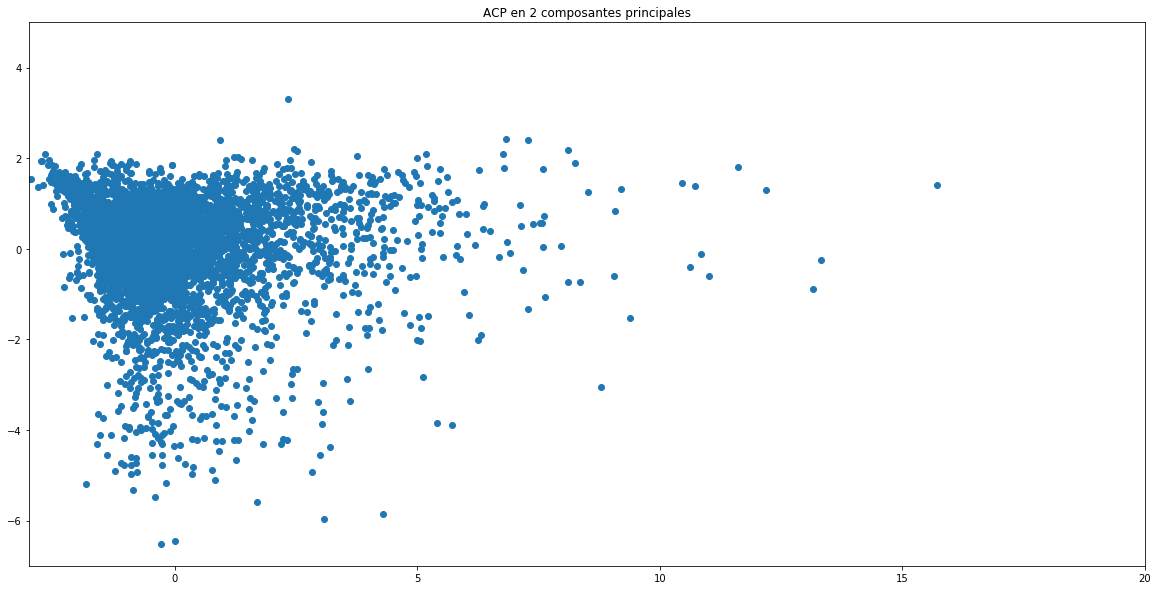

In [38]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.figure(figsize=(20, 10))
plt.scatter(X_projected[:,0], X_projected[:,1])
plt.xlim(xmin=-3, xmax = 20)
plt.ylim(ymin=-7, ymax = 5)
plt.title("ACP en 2 composantes principales")

(-0.7, 0.7)

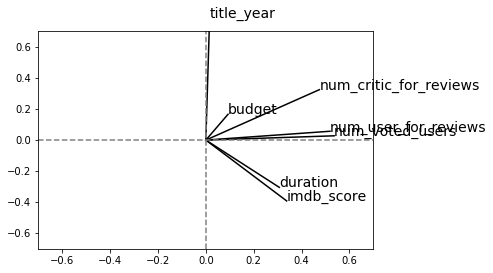

In [39]:
pcs = pca.components_

for i, (x,y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x,y)
    plt.plot([0, x], [0,y], color = 'k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x,y, mods.columns[i], fontsize='14')
    
# Afficher une ligne horizontale y = 0
plt.plot([-0.7, 0.7], [0,0], color = 'grey', ls='--')

# Afficher une ligne verticale x = 0
plt.plot([0,0], [-0.7, 0.7], color = 'grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

Ici en choisissant les 2 composantes on obtient une variance expliquée de 58% 

Mes principales observations :
- D’après le graphique, on ne peut pas clairement conclure sur des clusters évidents. 
- Parmi ces différentes variables on peut retrouver 3 différents groupes qui explique la variance : les votes, le score IMDB et la durée ainsi que l’année de production du film.

Ce qui est interessant à souligner ici est que l'année de production et le score IMDB ont des directions opposées. 
Ceci s'explique par le fait qu'en règle générale les films plus anciens ont un meilleur score IMDB que les films les plus récents. 

### b. t-SNE (t-Stochastic Neighbour Embedding)

Cette technique permet de visualiser des données de grandes dimensions, en effectuant un plongement dans une variété de plus petite dimension, c'est à dire que contrairement à l'ACP qui est une méthode globale, le t-SNE est une méthode locale qui considère chaque point de données séparément. 

In [40]:
from sklearn.manifold import TSNE
import seaborn as sn
import time

In [41]:
time_start = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(X_scaled)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 247.76200914382935 seconds


In [42]:
tsne_data

array([[-55.677605 ,  45.737335 ],
       [-50.449474 ,  37.255913 ],
       [-44.573997 ,  53.091427 ],
       ...,
       [ 19.345013 , -22.67775  ],
       [ 29.135317 , -17.319069 ],
       [ 15.0129795, -32.316235 ]], dtype=float32)

Text(0.5,1,'t-SNE')

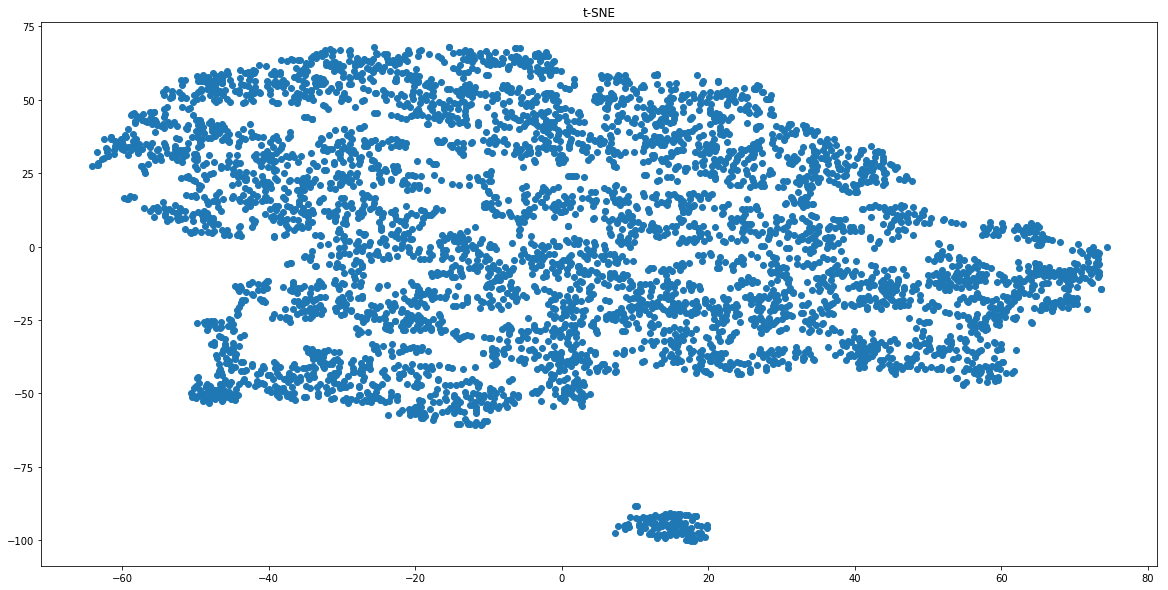

In [43]:
# afficher chaque observation
plt.figure(figsize=(20, 10))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
#plt.xlim(xmin=-3, xmax = 20)
#plt.ylim(ymin=-7, ymax = 5)
plt.title("t-SNE")

Encore une fois, les clusters ne sont évident à distinguer sur ce graphique. Or, c'est justement pour cela que cet algorithme est populaire. Cependant, cela nous permet de conclure que les variables numériques ne sont ici pas suffisantes pour distinguer les films. 

### c. Clustering en k-means + ACP

Populating the interactive namespace from numpy and matplotlib


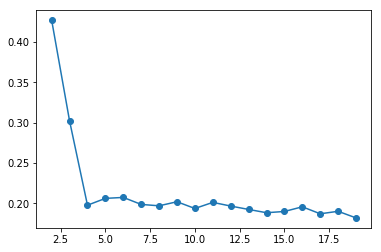

In [44]:
%pylab inline
from sklearn import cluster, metrics

silhouettes = []

for num_clusters in range (2,20):
    cls = cluster.KMeans(n_clusters = num_clusters,
                        n_init = 1, init = 'random')
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,20), silhouettes, marker='o')

Text(0.5,1,'ACP avec 16 clusters')

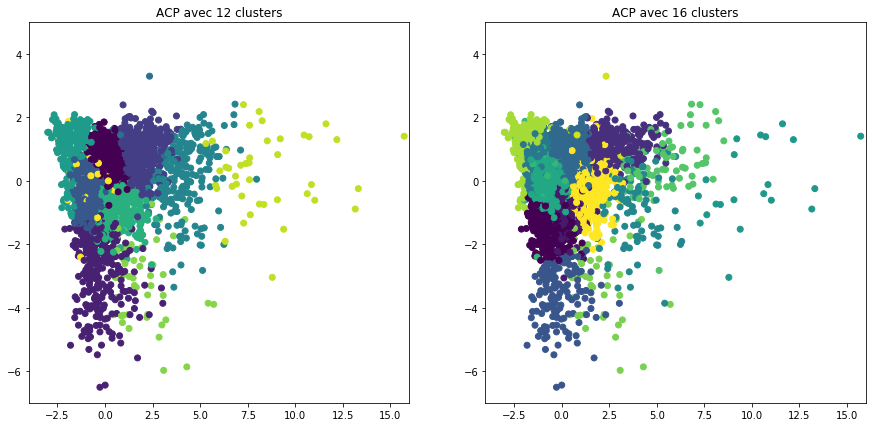

In [45]:
fig = plt.figure(figsize=(15,7))

cls = cluster.KMeans(n_clusters=12)
cls.fit(X_scaled)
ax = fig.add_subplot(121)
ax.scatter(X_projected[:, 0], X_projected[:, 1], c =cls.labels_)
plt.xlim(xmin=-4, xmax = 16)
plt.ylim(ymin=-7, ymax = 5)
plt.title("ACP avec 12 clusters")

cls3 = cluster.KMeans(n_clusters=16)
cls3.fit(X_scaled)
ax = fig.add_subplot(122)
ax.scatter(X_projected[:, 0], X_projected[:, 1], c =cls3.labels_)
plt.xlim(xmin=-4, xmax = 16)
plt.ylim(ymin=-7, ymax = 5)
plt.title("ACP avec 16 clusters")

### d. Clustering hierarchique

In [46]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams 
from sklearn.cluster import AgglomerativeClustering

import sklearn.metrics as sm

In [47]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [48]:
Z = linkage(X_scaled, 'ward')

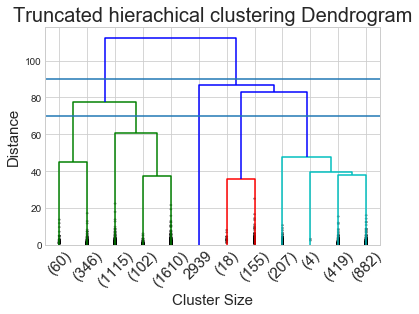

In [49]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15,
          show_contracted=True)
plt.title('Truncated hierachical clustering Dendrogram', fontsize=20)
plt.xlabel('Cluster Size', fontsize=15)
plt.ylabel('Distance', fontsize=15)

plt.axhline(y=90)
plt.axhline(y=70)

## 6- Feature Engineering

### Genres

In [50]:
df['genres']

0                         Action|Adventure|Fantasy|Sci-Fi
1                                Action|Adventure|Fantasy
2                               Action|Adventure|Thriller
3                                         Action|Thriller
4                                             Documentary
5                                 Action|Adventure|Sci-Fi
6                                Action|Adventure|Romance
7       Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                                 Action|Adventure|Sci-Fi
9                        Adventure|Family|Fantasy|Mystery
10                                Action|Adventure|Sci-Fi
11                                Action|Adventure|Sci-Fi
12                                       Action|Adventure
13                               Action|Adventure|Fantasy
14                               Action|Adventure|Western
15                        Action|Adventure|Fantasy|Sci-Fi
16                        Action|Adventure|Family|Fantasy
17            

In [51]:
unique_words = set()
for wordlist in df.genres.str.split('|').values:
    if wordlist is not np.nan:
        unique_words = unique_words.union(set(wordlist))
genreList = list(unique_words)
genreList

['Horror',
 'Family',
 'Adventure',
 'History',
 'Comedy',
 'Drama',
 'Animation',
 'Fantasy',
 'Musical',
 'Game-Show',
 'Thriller',
 'Short',
 'Music',
 'Mystery',
 'Documentary',
 'Sci-Fi',
 'Sport',
 'Western',
 'Reality-TV',
 'News',
 'Biography',
 'Film-Noir',
 'Romance',
 'War',
 'Crime',
 'Action']

In [52]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [53]:
df['genres_bin'] = df['genres'].apply(lambda x: binary(x))

In [54]:
df['genres_bin'][0]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [55]:
df['genres'][0]

'Action|Adventure|Fantasy|Sci-Fi'

### Plot keywords

In [56]:
df['plot_keywords']

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
5       alien|american civil war|male nipple|mars|prin...
6               sandman|spider man|symbiote|venom|villain
7       17th century|based on fairy tale|disney|flower...
8       artificial intelligence|based on comic book|ca...
9                        blood|book|love|potion|professor
10      based on comic book|batman|sequel to a reboot|...
11      crystal|epic|lex luthor|lois lane|return to earth
12      action hero|attempted rape|bond girl|official ...
13      box office hit|giant squid|heart|liar's dice|m...
14                  horse|outlaw|texas|texas ranger|train
15      based on comic book|british actor playing amer...
16      brother brother relationship|brother sister re...
17        alie

In [57]:
unique_words = set()
for wordlist in df.plot_keywords.str.split('|').values:
    if wordlist is not np.nan:
        unique_words = unique_words.union(set(wordlist))
plot_list = list(unique_words)
plot_list

['messiah',
 'lego',
 'eccentric',
 'exodus',
 'theatre',
 'mayan',
 'hostility',
 'fidel castro',
 'prom',
 'steve',
 'hiv positive',
 'middle class',
 'guantanamo bay',
 'cobra',
 'crime boss',
 'cmnf',
 '1850s',
 'reference to tupac shakur',
 'forced prostitution',
 'showdown',
 'rabbi',
 'voyeur',
 'stagecoach',
 'summer love',
 'monologue',
 'wartime rape',
 'world war two',
 'yukon',
 'lowell massachusetts',
 'congenital liar',
 'medallion',
 'punching bag',
 'giant squid',
 'track',
 'psychic power',
 'tintin',
 'lesbian relationship',
 'double agent',
 'avatar',
 'graduation',
 'old age',
 'ticket',
 'basketball',
 'cia',
 'foot chase',
 'puss in boots',
 'backstage',
 'football coach',
 'u.s. air force',
 'stepmother stepdaughter relationship',
 'sex in a pool',
 'german soldier',
 'revisionist history',
 'marigold',
 'witness',
 'waitress',
 'male star appears nude',
 'tennis',
 'reunion',
 'guerrilla army',
 'f word',
 'humpback whales',
 'industrialist',
 'american actress 

In [58]:
def binary(words):
    binaryList = []

    for keywords in plot_list:
        if keywords in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [59]:
df=df.dropna(subset=['plot_keywords'])

In [60]:
df['plot_bin'] = df['plot_keywords'].apply(lambda x: binary(x))

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Actors

In [61]:
df['cast'] = df['actor_1_name']+'|'+ df['actor_2_name']+'|'+ df['actor_3_name']

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df['cast']

0                  CCH Pounder|Joel David Moore|Wes Studi
1                Johnny Depp|Orlando Bloom|Jack Davenport
2           Christoph Waltz|Rory Kinnear|Stephanie Sigman
3           Tom Hardy|Christian Bale|Joseph Gordon-Levitt
5               Daryl Sabara|Samantha Morton|Polly Walker
6                 J.K. Simmons|James Franco|Kirsten Dunst
7                   Brad Garrett|Donna Murphy|M.C. Gainey
8       Chris Hemsworth|Robert Downey Jr.|Scarlett Joh...
9              Alan Rickman|Daniel Radcliffe|Rupert Grint
10               Henry Cavill|Lauren Cohan|Alan D. Purwin
11              Kevin Spacey|Marlon Brando|Frank Langella
12        Giancarlo Giannini|Mathieu Amalric|Rory Kinnear
13               Johnny Depp|Orlando Bloom|Jack Davenport
14                  Johnny Depp|Ruth Wilson|Tom Wilkinson
15           Henry Cavill|Christopher Meloni|Harry Lennix
16      Peter Dinklage|Pierfrancesco Favino|Damián Alc...
17      Chris Hemsworth|Robert Downey Jr.|Scarlett Joh...
18            

In [63]:
df=df.dropna(subset=['cast'])

In [64]:
unique_names = set()
for namelist in df.cast.str.split('|').values:
    if namelist is not np.nan:
        unique_names = unique_names.union(set(namelist))     
namesList = list(unique_names)
namesList

['José Wilker',
 'Dottie Alexander',
 'John Cassavetes',
 'Roger Lloyd Pack',
 'Gena Rowlands',
 'Countess Vaughn',
 'Paul Gross',
 'Charles Aidman',
 'David Paymer',
 'Eddie Albert',
 'Alison Doody',
 'Jerry Stiller',
 'Paul Sorvino',
 'Gary Cooper',
 'Ioan Gruffudd',
 'Cara Horgan',
 'Eddie Izzard',
 'Joey Lawrence',
 'Sylvester Stallone',
 'Kurt Fuller',
 'Ella Joyce',
 'Ellie Kendrick',
 'William Lee Scott',
 'Philip Winchester',
 'George Hamilton',
 'Martin Clunes',
 'Daniel Bernhardt',
 'Brooke Newton',
 'Ian Ziering',
 'Linda Kozlowski',
 'David DeLuise',
 'Gary Lewis',
 'Luenell',
 'Sanjay Dutt',
 'Joe Egan',
 'Hassan Johnson',
 'Aryana Engineer',
 'Seymour Cassel',
 'Jordan Carlos',
 'Mae West',
 'Jake Weary',
 'Alan Brent',
 'Colin Salmon',
 'John Larroquette',
 "Nicole 'Snooki' Polizzi",
 'Jérôme Deschamps',
 'Tucker Albrizzi',
 "Eddie 'Piolin' Sotelo",
 'Taliesin Jaffe',
 'Benoît Poelvoorde',
 'Katharine Isabelle',
 "Hugh O'Brian",
 'George T. Odom',
 'Eva LaRue',
 'David B

In [65]:
def binary(name_list):
    binaryList = []
    
    for names in namesList:
        if names in name_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [66]:
df['cast_bin'] = df['cast'].apply(lambda x: binary(x))

In [67]:
sum(df['cast_bin'][5])

3

### Director

In [68]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df['director_name']=df['director_name'].apply(xstr)

In [69]:
directorList=[]
for i in df['director_name']:
    if i not in directorList:
        directorList.append(i)

In [70]:
directorList

['James Cameron',
 'Gore Verbinski',
 'Sam Mendes',
 'Christopher Nolan',
 'Andrew Stanton',
 'Sam Raimi',
 'Nathan Greno',
 'Joss Whedon',
 'David Yates',
 'Zack Snyder',
 'Bryan Singer',
 'Marc Forster',
 'Andrew Adamson',
 'Rob Marshall',
 'Barry Sonnenfeld',
 'Peter Jackson',
 'Marc Webb',
 'Ridley Scott',
 'Chris Weitz',
 'Anthony Russo',
 'Peter Berg',
 'Colin Trevorrow',
 'Shane Black',
 'Tim Burton',
 'Brett Ratner',
 'Dan Scanlon',
 'Michael Bay',
 'Joseph Kosinski',
 'John Lasseter',
 'Martin Campbell',
 'Lee Unkrich',
 'McG',
 'James Wan',
 'J.J. Abrams',
 'Baz Luhrmann',
 'Mike Newell',
 'Guillermo del Toro',
 'Steven Spielberg',
 'Peter Sohn',
 'Mark Andrews',
 'Justin Lin',
 'Roland Emmerich',
 'Robert Zemeckis',
 'Lana Wachowski',
 'Pete Docter',
 'Rob Letterman',
 'Jon Favreau',
 'Martin Scorsese',
 'Rob Cohen',
 'David Ayer',
 'Tom Shadyac',
 'Doug Liman',
 'Kevin Reynolds',
 'Stephen Sommers',
 'Rupert Sanders',
 'Robert Stromberg',
 'Matt Reeves',
 'Roland Joffé',
 '

In [71]:
df=df.dropna(subset=['director_name'])

In [72]:
def binary(director_list):
    binaryList = []
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [73]:
df['director_bin'] = df['director_name'].apply(lambda x: binary(x))

# 6- Modèle final : fonction simple et personnalisable de distance

## Fonction de distance

In [74]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin
0,1.0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,2009.0,936.0,7.9,1.78,33000,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CCH Pounder|Joel David Moore|Wes Studi,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1.0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,2007.0,5000.0,7.1,2.35,0,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Johnny Depp|Orlando Bloom|Jack Davenport,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1.0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,2015.0,393.0,6.8,2.35,85000,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Christoph Waltz|Rory Kinnear|Stephanie Sigman,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1.0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2012.0,23000.0,8.5,2.35,164000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Tom Hardy|Christian Bale|Joseph Gordon-Levitt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,1.0,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,2012.0,632.0,6.6,2.35,24000,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Daryl Sabara|Samantha Morton|Polly Walker,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 0 to 5042
Data columns (total 33 columns):
color                        4737 non-null float64
director_name                4750 non-null object
num_critic_for_reviews       4725 non-null float64
duration                     4742 non-null float64
director_facebook_likes      4660 non-null float64
actor_3_facebook_likes       4750 non-null float64
actor_2_name                 4750 non-null object
actor_1_facebook_likes       4750 non-null float64
gross                        4005 non-null float64
genres                       4750 non-null object
actor_1_name                 4750 non-null object
movie_title                  4750 non-null object
num_voted_users              4750 non-null int64
cast_total_facebook_likes    4750 non-null int64
actor_3_name                 4750 non-null object
facenumber_in_poster         4739 non-null float64
plot_keywords                4750 non-null object
movie_imdb_link              4750 non

Text(0.5,1,'Proportion de valeurs manquantes par colonnes ')

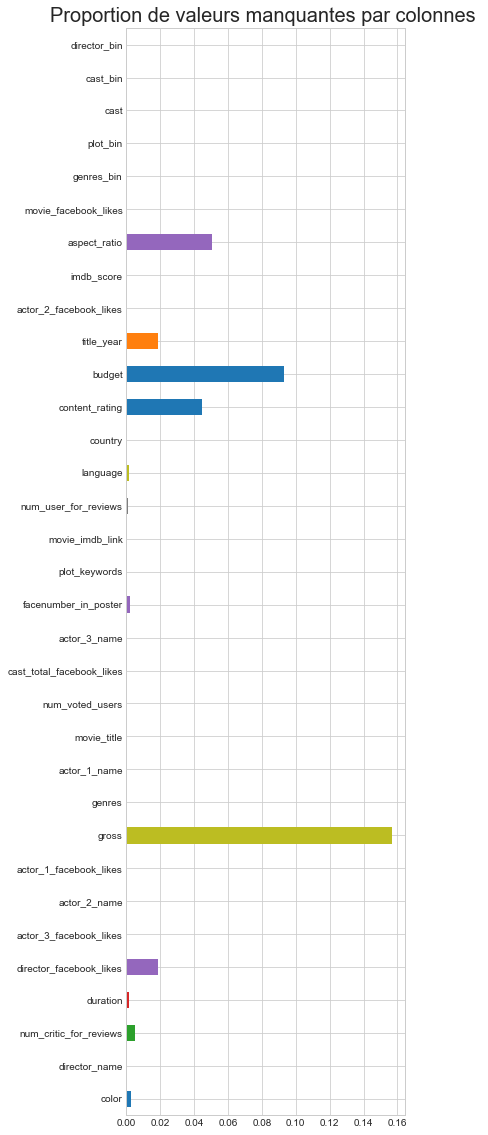

In [76]:
# Proportion de valeurs manquantes par colonnes 

plt.figure(figsize=(5, 20))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion de valeurs manquantes par colonnes ", fontsize=20)

In [77]:
df=df.dropna(subset=['title_year'])

Text(0.5,1,'Proportion de valeurs manquantes par colonnes ')

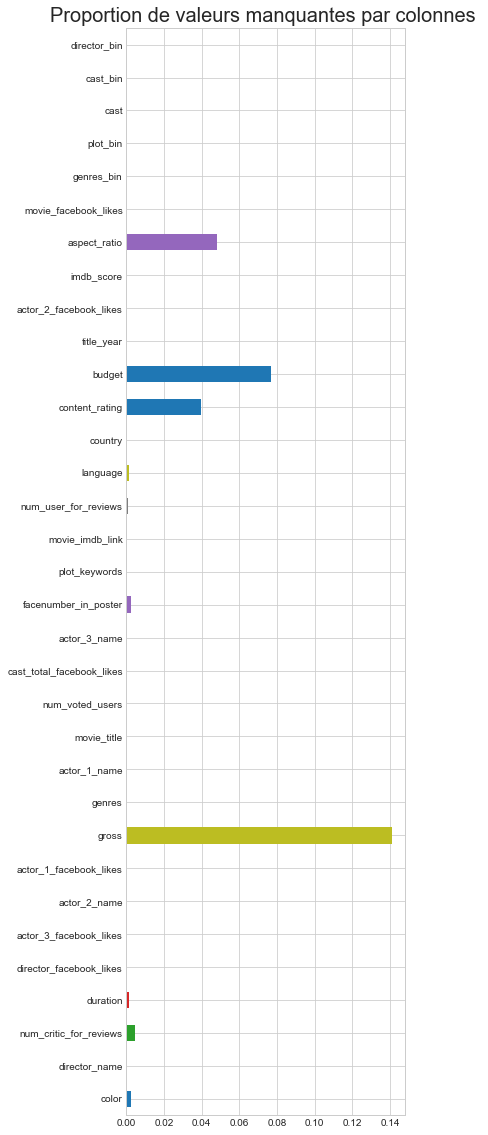

In [78]:
# Proportion de valeurs manquantes par colonnes 

plt.figure(figsize=(5, 20))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion de valeurs manquantes par colonnes ", fontsize=20)

In [79]:
df=df.dropna(subset=['color', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews', 
                    'language'])

Text(0.5,1,'Proportion de valeurs manquantes par colonnes ')

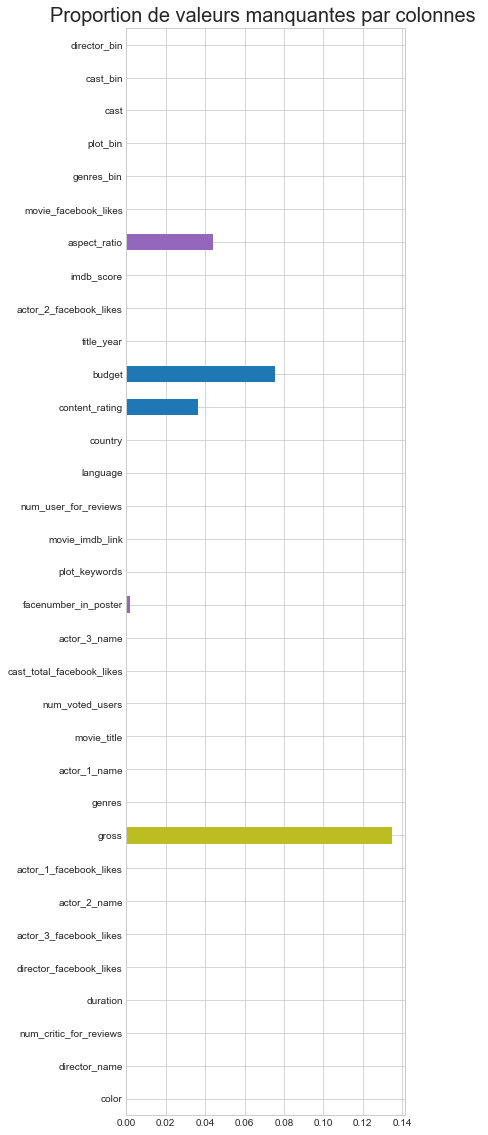

In [80]:
# Proportion de valeurs manquantes par colonnes 

plt.figure(figsize=(5, 20))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion de valeurs manquantes par colonnes ", fontsize=20)

À partir d'ici nous n'utiliserons plus les variables contenant des valeurs manquantes.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4619 entries, 0 to 5042
Data columns (total 33 columns):
color                        4619 non-null float64
director_name                4619 non-null object
num_critic_for_reviews       4619 non-null float64
duration                     4619 non-null float64
director_facebook_likes      4619 non-null float64
actor_3_facebook_likes       4619 non-null float64
actor_2_name                 4619 non-null object
actor_1_facebook_likes       4619 non-null float64
gross                        3996 non-null float64
genres                       4619 non-null object
actor_1_name                 4619 non-null object
movie_title                  4619 non-null object
num_voted_users              4619 non-null int64
cast_total_facebook_likes    4619 non-null int64
actor_3_name                 4619 non-null object
facenumber_in_poster         4610 non-null float64
plot_keywords                4619 non-null object
movie_imdb_link              4619 non

In [82]:
numerical = ['movie_title', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_3_facebook_likes', 'actor_1_facebook_likes',
            'num_voted_users', 'cast_total_facebook_likes','num_user_for_reviews', 
            'title_year', 'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']

In [83]:
num_values = df[numerical]

In [84]:
num_values

,movie_title,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Avatar,723.0,178.0,0.0,855.0,1000.0,886204,4834,3054.0,2009.0,936.0,7.9,33000
1,Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,471220,48350,1238.0,2007.0,5000.0,7.1,0
2,Spectre,602.0,148.0,0.0,161.0,11000.0,275868,11700,994.0,2015.0,393.0,6.8,85000
3,The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,1144337,106759,2701.0,2012.0,23000.0,8.5,164000
5,John Carter,462.0,132.0,475.0,530.0,640.0,212204,1873,738.0,2012.0,632.0,6.6,24000
6,Spider-Man 3,392.0,156.0,0.0,4000.0,24000.0,383056,46055,1902.0,2007.0,11000.0,6.2,0
7,Tangled,324.0,100.0,15.0,284.0,799.0,294810,2036,387.0,2010.0,553.0,7.8,29000
8,Avengers: Age of Ultron,635.0,141.0,0.0,19000.0,26000.0,462669,92000,1117.0,2015.0,21000.0,7.5,118000
9,Harry Potter and the Half-Blood Prince,375.0,153.0,282.0,10000.0,25000.0,321795,58753,973.0,2009.0,11000.0,7.5,10000
10,Batman v Superman: Dawn of Justice,673.0,183.0,0.0,2000.0,15000.0,371639,24450,3018.0,2016.0,4000.0,6.9,197000


In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_values.iloc[:,1:] = scaler.fit_transform(num_values.iloc[:,1:])

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [86]:
num_values.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000
mean,0.176441,0.299160,0.031015,0.028414,0.010562,0.051600,0.015200,0.055346,0.844322,0.012394,0.627037,0.022037
std,0.147797,0.071443,0.125000,0.072593,0.023489,0.083610,0.027773,0.074965,0.138286,0.030068,0.143197,0.056375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068350,0.253165,0.000348,0.006130,0.000991,0.006273,0.002260,0.014430,0.808989,0.002153,0.545455,0.000000
50%,0.140394,0.284810,0.002217,0.016522,0.001563,0.021845,0.004868,0.032220,0.876404,0.004460,0.649351,0.000504
75%,0.241379,0.329114,0.008717,0.027870,0.017188,0.059043,0.021757,0.066219,0.932584,0.006763,0.727273,0.011461
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
num_values.shape

(4619, 13)

In [119]:
from scipy import spatial

def distance_numerical(movie1, movie2):
    a = num_values.iloc[movie1]
    b = num_values.iloc[movie2]
    distance = []
    for i in range(1,12):
        
        scoreA = a.iloc[i]
        scoreB = b.iloc[i]
        scoreDistance = spatial.distance.euclidean(scoreA, scoreB)
        distance.append(scoreDistance)
                                                                                                 
                                                   
    return sum(distance)




In [90]:
from scipy import spatial

def distance_categorical(movie1, movie2):
    a = df.iloc[movie1]
    b = df.iloc[movie2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    castA = a['cast_bin']
    castB = b['cast_bin']
    castDistance = spatial.distance.cosine(castA, castB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.hamming(directA, directB)
    
    plotA = a['plot_bin']
    plotB = b['plot_bin']
    plotDistance = spatial.distance.cosine(plotA, plotB)
                                                   
    colorA = a['color']
    colorB = b['color']
    
    colorDistance = spatial.distance.hamming(colorA, colorB)    
                                                                                                          
                                                   
    return (genreDistance + directDistance + castDistance + plotDistance + colorDistance)


In [91]:
new_id=list(range(0,df.shape[0]))
df['new_id']=new_id
num_values['new_id']=new_id

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
import operator

In [120]:
def get_recommendations(movie):
    new_movie=df[df['movie_title'].str.contains(movie)].iloc[0].to_frame().T
    distances = []
    
    for index, movie in df.iterrows():
        if movie['new_id'] != new_movie['new_id'].values[0]:
            dist = distance_categorical(new_movie['new_id'].values[0], movie['new_id']) + distance_numerical(new_movie['new_id'].values[0], movie['new_id']) 
            distances.append((movie['new_id'], dist))
    
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    
    for x in range(5):
        neighbors.append(distances[x])

    movies_similar = [df.iloc[neighbors[0][0]]['movie_title'], df.iloc[neighbors[1][0]]['movie_title'],
                      df.iloc[neighbors[2][0]]['movie_title'], df.iloc[neighbors[3][0]]['movie_title'],
                      df.iloc[neighbors[4][0]]['movie_title']]
            
    return movies_similar

In [166]:
get_recommendations('Avatar')


Recommended Movies: 

Star Trek 
Star Trek II: The Wrath of Khan 
Destiny 
Serenity 
Iron Man 


In [122]:
get_recommendations('Man of Steel')

['Batman v Superman: Dawn of Justice',
 'Avatar',
 'Prometheus',
 'The Amazing Spider-Man',
 'Mad Max: Fury Road']

In [129]:
get_recommendations("Captain America: Civil War")

['Avengers: Age of Ultron',
 'Captain America: The Winter Soldier',
 'Iron Man 2',
 'The Avengers',
 'Thor']